주성분 분석(PCA) : 차원 축소 응용

목표: 데이터의 차원을 축소하여 이해하기 쉽게 시각화

via 최효원's Jupyter Notebook

첫번째 작업은 K-means clustering 작업에서 예측 결과가 포함된 최종 고객 분석 데이터셋을 활용했습니다.
두번째 작업은 독립변수가 1000개가 넘지만 변수명이 없는 데이터셋을 활용했습니다.

수많은 독립변수의 갯수를 줄이면서, 가능한 그 특성을 보존해낼 수 있고
기존 변수 중 일부를 그대로 선택하는 방식이 아닌, 기존 변수 정보를 모두 반영하는
새로운 변수를 만드는 차원 축소 작업을 PCA 를 활용해 진행했습니다.

두번째 작업에서는 PCA 전과 후, 모델 학습 시간이 얼마나 단축되는지 확인했습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data 1 (K-means clustering 작업 결과물 데이터셋)

df = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv')
#데이터 출처 : https://raw.githubusercontent.com/snkn1959/data_source
df.head()
#amt(거래금액) ~ category_travel : 독립변수
#label - 고객 군집(종속변수, target)

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [2]:
X = df.drop('label', axis = 1)
#독립변수 지정
y = df['label']
#종속변수 지정

In [4]:
from sklearn.decomposition import PCA
#import
pca = PCA(n_components = 2)
#객체 생성, 주성분 갯수 지정
X = pd.DataFrame(pca.fit_transform(X), columns = ['PC1','PC2'])
#PCA 객체 학습 및 변환 후, 넘파이 형태 결과물을 판다스 데이터프레임 형태로,
X.head()

,PC1,PC2
0,-3.929061,0.102604
1,3.107583,-1.748879
2,3.023793,3.212212
3,-4.282418,0.011378
4,2.590658,-1.906121


In [5]:
X = X.join(y)
#종속변수 데이터 join
X.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


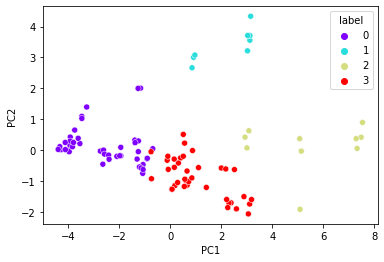

In [6]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = X, hue = 'label',\
               palette = 'rainbow')
plt.show()
#산점도 시각화

In [10]:
df_comp = pd.DataFrame(pca.components_, columns = df.drop('label', axis = 1).columns)
#pca.components_ : 각 주성분과 변수의 관계 확인, 데이터프레임 형태로 변환

In [11]:
df_comp

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


*index 0 : PC1

*index 1 : PC2

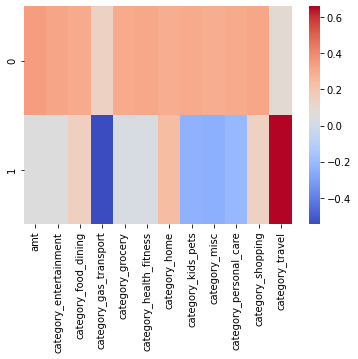

In [12]:
#데이터프레임을 히트맵으로 시각화
sns.heatmap(df_comp, cmap = 'coolwarm')
plt.show()

*양수이면 빨간색, 음수이면 파란색으로 표시됩니다.

*직관적으로 index 1(PC2) 성분이 gas_transport 변수와 비교적 강한 음의 상관 관계, travel 변수와 비교적 강한 양의 상관 관계를 띕니다.

*이는 PC2 성분이 클수록 gas_transport 에 해당되는 값은 낮고, travel 에 해당되는 값은 높다는 의미라 할 수 있습니다.

In [2]:
#Data 2 - 변수 이름이 익명 처리돼있는 데이터셋

df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv')
#데이터 출처 : https://media.githubusercontent.com/media/musthave-ML10/data_source
df.head()
#class : 0 과 1로 이루어짐, target 변수
#total : 5 rows / 4297 cols
#독립변수가 매우 많습니다.

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [17]:
df['class'].mean()
#데이터 종속변수 중 1의 비율

0.25

In [19]:
df.isnull().sum().sum()
#결측치 확인

0

In [22]:
from sklearn.model_selection import train_test_split
#학습셋/시험셋 분리

xtr, xt, ytr, yt = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.2,\
                                   random_state = 100)

#PCA - 변수 간 스케일을 일정하게 맞춰주는 것이 중요합니다.
from sklearn.preprocessing import StandardScaler
#Scaler import

sc = StandardScaler()
scaled_xtr = sc.fit_transform(xtr)
#훈련셋 변환
scaled_xt = sc.transform(xt)
#시험셋 변환

In [23]:
from sklearn.ensemble import RandomForestClassifier
#일반적인 모델 import 
rf = RandomForestClassifier(random_state = 100)

#소요시간 비교를 위한 처리
import time
start_time = time.time()
#시작 시간 설정
rf.fit(scaled_xtr, ytr)
#학습
print(time.time() - start_time)
#PCA 작업 전 모델링 작업 시, 소요 시간 출력

93.0603358745575


In [24]:
#PCA 작업 전 모델 성능 측정
from sklearn.metrics import accuracy_score, roc_auc_score

predrf = rf.predict(scaled_xt)
accuracy_score(yt, predrf)

0.958

In [25]:
probarf = rf.predict_proba(scaled_xt)
roc_auc_score(yt, probarf[:,1])

0.9982541957107813

*PCA 작업 전 모델링 소요 시간은 약 93초, 매우 높은 accuracy_score 와 roc_auc_score 를 확인할 수 있었습니다.

In [27]:
#PCA 처리 진행

pca= PCA(n_components = 2)
#4000개 넘는 독립변수를 임의로 설정한 두 개의 주성분으로 압축
pca.fit(scaled_xtr)
#학습

PCA(n_components=2)

In [28]:
pca.explained_variance_ratio_
#데이터 반영 비율 확인(기존 변수들의 특성을 얼마만큼 내포하고 있는가,)

array([0.04992445, 0.03331409])

*이 둘을 합쳐봐야 0.08, 즉 기존 데이터의 0.08 정도의 정보만 반영한다는 의미입니다.

*최적의 주성분 갯수는 주관적 판단에 의하지만, 도움을 받기 위해 K-means 작업 시 활용한 elbow method 적용을 시도했습니다.

In [29]:
var_ratio = []
#빈 리스트 생성

for i in range(100, 550, 50):
    #순회, 임의로 주성분 갯수를 50 개 단위로 100 부터 500 까지 확인
    pca = PCA(n_components = i)
    #주성분 갯수 지정
    pca.fit_transform(scaled_xtr)
    #학습 및 변환
    ratio = pca.explained_variance_ratio_.sum()
    #데이터 반영 비율 합
    var_ratio.append(ratio)
    #결과 리스트에 저장

<AxesSubplot:>

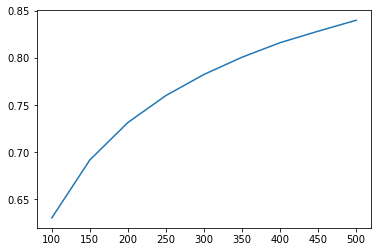

In [30]:
sns.lineplot(x = range(100,550,50), y = var_ratio)
#선형 그래프 시각화

*확인 결과, 주성분 수 100 ~ 500 범위에서 얻을 수 있는 데이터 반영 비율 합은 약 62 % ~ 82 % 정도입니다.

*20 % 정도 손실을 감수하고, 약 80& 데이터 반영 기준을 잡고, 근사치인 주성분 갯수 400 개를 채택 후 모델링을 진행했습니다.

In [31]:
pca = PCA(n_components = 400, random_state = 100)
#주성분 갯수 지정 : 400
pca_xtr = pca.fit_transform(scaled_xtr)
#훈련셋 학습 및 변환
pca_xt = pca.transform(scaled_xt)
#시험셋 변환

In [32]:
#PCA 처리 후 데이터를 랜덤 포레스트 분류기에 학습, 소요시간 계산
rf2 = RandomForestClassifier(random_state = 100)

start_time = time.time()
rf2.fit(pca_xtr, ytr)
print(time.time() - start_time) 

57.033292055130005


*PCA 작업 후, 랜덤 포레스트 모델링 소요 시간은 약 57초, 작업 전보다 월등히 소요 시간이 향상됐습니다.

In [33]:
#PCA 작업 후 랜덤 포레스트 모델 예측 정확도 

pred2 = rf2.predict(pca_xt)
accuracy_score(yt, pred2)

0.9885

In [34]:
proba2 = rf2.predict_proba(pca_xt)
roc_auc_score(yt, proba2[:,1])

0.9981628737279284

*PCA 이전과 거의 유사한 수준의 예측력을 확인했고, 소요 시간 단축을 확인할 수 있었습니다.